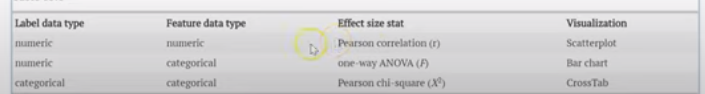

In [1]:
from IPython.display import Image
Image("bivariate analysis.PNG")

# Correlation

1] Pearson's correlation:- 

The correlation between two variables that each have a Gaussian distribution or having linear relationship can be calculated using standard methods such as the Pearson’s correlation. This procedure cannot be used for data that does not have a Gaussian distribution. Instead, rank correlation methods must be used.


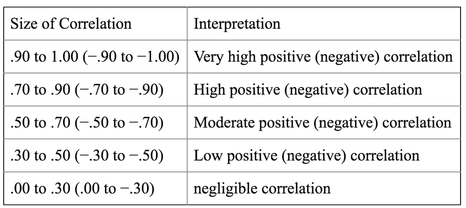

In [9]:
from IPython.display import Image
Image("correlation_vlues.png")

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
from scipy.stats import pearsonr
value , p_value =pearsonr(df.age,df.charges)
value , p_value 

(0.29900819333064765, 4.8866933317203816e-29)

In [16]:
 
'''
  H0: there IS NOT a significant linear relationship 
(correlation) between x and  y  in the population 

H1:There IS a significant linear relationship (correlation) between x and  y
 in the population.'''

p_value<0.05  # reject H0

True

# chi square test


In [30]:
# correlation with categorical and categorical features 
# we use chisquare test 

from scipy.stats import chi2_contingency
# find cross tab chitable
chitable  = pd.crosstab(df.smoker,df.sex)
chitable

sex,female,male
smoker,,
no,547,517
yes,115,159


In [31]:
stats,p_value,dof,expected=chi2_contingency(chitable)
p_value

0.006548143503580696

In [32]:
# H0: there is no dependecncy between smoker and sex 
# H1: there is  dependecncy between smoker and sex
p_value<0.05 # reject H0


True

In [33]:
chitable  = pd.crosstab(df.region,df.children)
chitable

children,0,1,2,3,4,5
region,,,,,,
northeast,147,77,51,39,7,3
northwest,132,74,66,46,6,1
southeast,157,95,66,35,5,6
southwest,138,78,57,37,7,8


In [35]:
stats,p_value,dof,expected=chi2_contingency(chitable)
p_value # there is no dependecy between children and region

0.5428263602033943

# one way Anova
Dependent variable - Countinious 

Independent variable is - categorical 

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [37]:
model = ols('charges~C(sex)',df).fit() 

# H0: there is no significant diffrence(impact ) in the charges  w.r.to sex 
# H1: there is significant diffrence(impact) in the charges w.r.to sex 

In [39]:
p_value =model.f_pvalue

In [43]:
p_value

0.03613272100595995

In [42]:
p_value<0.05 # reject H0

True

In [44]:
# there is significant diffrence(impact) in the charges w.r.to sex

In [45]:
one_way = sm.stats.anova_lm(model,typ=2)  # 2  for anova and ancova # 1 for regression 
one_way

,sum_sq,df,F,PR(>F)
C(sex),6.435902e+08,1.0,4.399702,0.036133
Residual,1.954306e+11,1336.0,NaN,NaN


In [46]:
model = ols('charges~C(smoker)',df).fit() 

In [48]:
model.f_pvalue <0.05 # reject H0 
# so there is 

True